# IoT전자공학과 강준구 입니다.

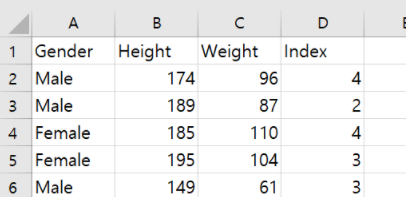

500명의 서로다른 성별과 키, 몸무게 그리고 건강등급입니다.   
이러한 데이터를 활용하여 BMI를 계산하고 그에따른 분포도를 시각화해 의미를 도출합니다.   
## 최종 목표 
1. 키와 몸무게 분포도
2. BMI 지수와 건강등급이 과연 성별과 관련이 있을까? 
3. 인공지능은 어떻게 볼까?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.font_manager as fm
font_path = r'C:\Windows\Fonts\batang.ttc'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [3]:
df=pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
df.head()

Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3

In [4]:
df.columns=['Gender','Height','Weight','Health']
df.head()

Gender  Height  Weight  Health
0    Male     174      96       4
1    Male     189      87       2
2  Female     185     110       4
3  Female     195     104       3
4    Male     149      61       3

null값이 있는지도 확인해야겠죠? 다행이 없네요

In [5]:
df.isna().sum()

Gender    0
Height    0
Weight    0
Health    0
dtype: int64

In [6]:
df.memory_usage(deep=True)

Index       128
Gender    31010
Height     4000
Weight     4000
Health     4000
dtype: int64

이제 메모리를 확인해보죠. 현재 15.8KB가 넘습니다.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Health  500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


Gender는 굳이 Object일 필요가 없으니 category로, 키와 몸무게가 255가 넘을일은 없겠죠? uint8로 바꾸어줍니다.

In [8]:
df['Gender']=df['Gender'].astype('category')
df['Height']=df['Height'].astype(np.uint8)
df['Weight']=df['Weight'].astype(np.uint8)
df['Health']=df['Health'].astype(np.uint8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Gender  500 non-null    category
 1   Height  500 non-null    uint8   
 2   Weight  500 non-null    uint8   
 3   Health  500 non-null    uint8   
dtypes: category(1), uint8(3)
memory usage: 2.2 KB


총 데이터가 13%로 감소하였습니다

In [10]:
print(2200/15800)

0.13924050632911392


이제 본격적으로 분석을 시작하겠습니다. 먼저 전체 키와 몸무게의 히스토그램을 통해 분포를 보겠습니다.

C:\Users\rkdwn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '키 히스토그램')

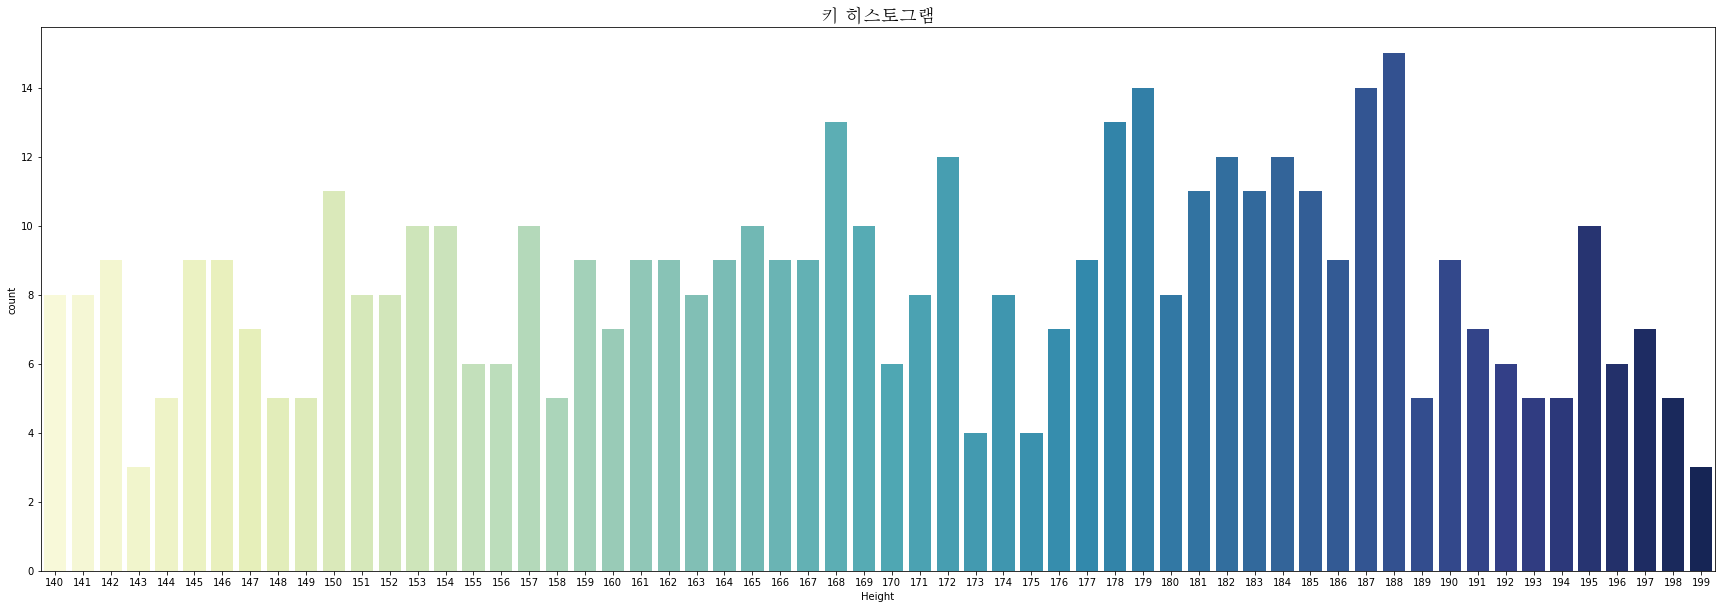

In [11]:
plt.rcParams['figure.figsize'] = (30, 10)
sns.countplot(df['Height'], palette='YlGnBu')
ax = plt.gca()
ax.set_title("키 히스토그램",fontproperties=fontprop)

C:\Users\rkdwn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '몸무게 히스토그램')

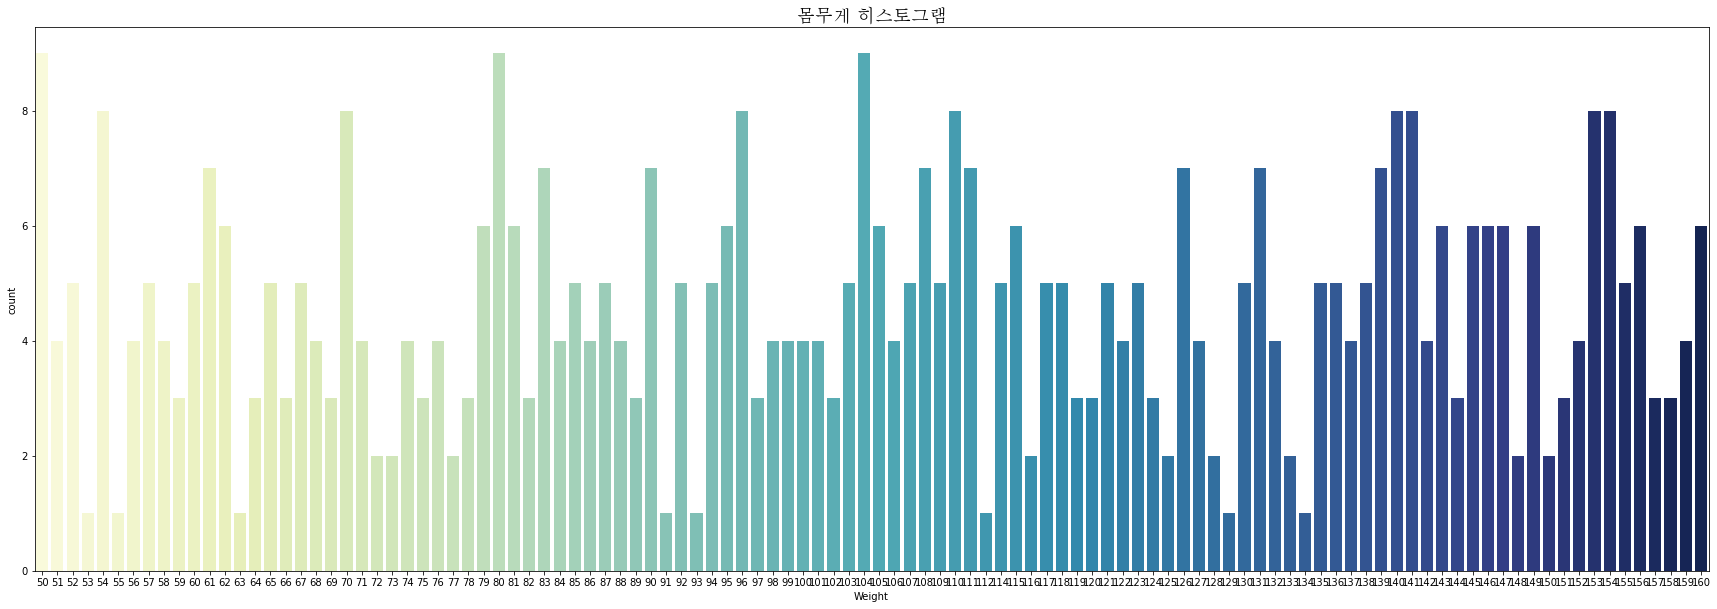

In [12]:
plt.rcParams['figure.figsize'] = (30, 10)
sns.countplot(df['Weight'], palette='YlGnBu')
ax = plt.gca()
ax.set_title("몸무게 히스토그램",fontproperties=fontprop)

다음은 키와  몸무게 히스토그램입니다.   
오른쪽으로 갈수록 큰키와 높은 몸무게 인데요 언뜻 보면 골고루 분포되어있는것같습니다.  
하지만 실제 건강등급은 다릅니다. 

C:\Users\rkdwn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '건강등급 히스토그램')

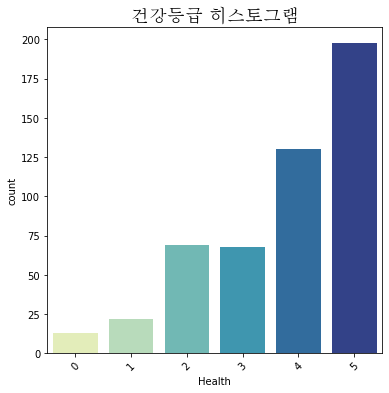

In [13]:
plt.rcParams['figure.figsize'] = (6, 6)
sns.countplot(df['Health'], palette='YlGnBu')
plt.xticks(rotation=45)
ax = plt.gca()
ax.set_title("건강등급 히스토그램",fontproperties=fontprop)

숫자가 높아질수록 비만입니다. 극도의 비만이 가장 많이 있음을 볼 수 있습니다.

도대체 어떻게 분포가 되어있는지 보겠습니다. 네,, 생략하고 바로 시각화해보죠

In [14]:
df.describe()

Height      Weight      Health
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000

몸무게는 100K대에 많이 몰려있고, 키는 180정도에 몰려있음을 알 수 있습니다.

<AxesSubplot:xlabel='Weight', ylabel='Density'>

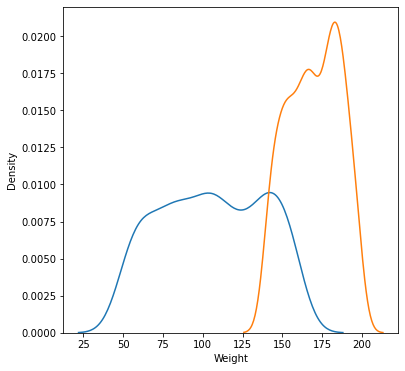

In [15]:
sns.kdeplot(df.Weight)
sns.kdeplot(df.Height)

## 이것을 한눈에 보면 다음과 같습니다.
몸무게가 증가할수록 건강등급은 높아지고(비만이 되고) 키가 줄어들수록 역시 건강등급이 높아집니다.

C:\Users\rkdwn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rkdwn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


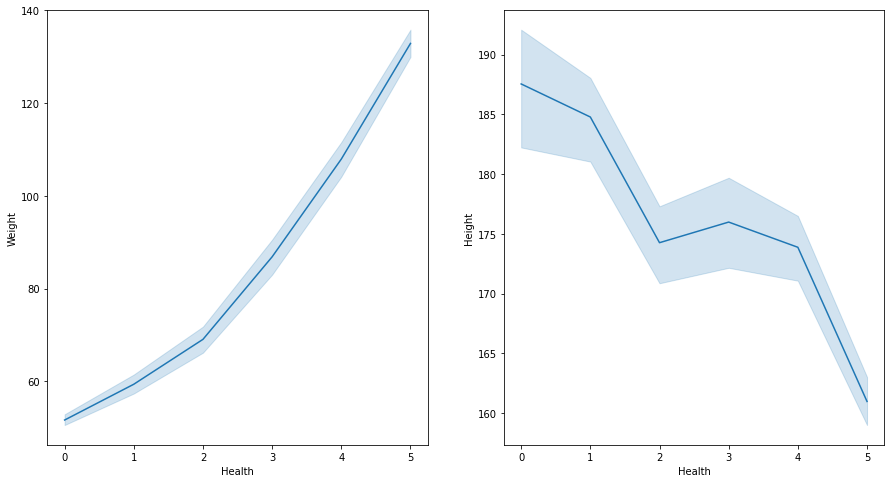

In [16]:
fig, ax= plt.subplots(1,2, figsize=(15,8))
sns.lineplot(df['Health'],df['Weight'], ax=ax[0])
sns.lineplot(df['Health'],df['Height'], ax=ax[1])
plt.show()

건강등급을 0~5로 나누는건 가독성이 떨어집니다. 그러니 문자열로 바꾸어보겠습니다

In [17]:
def healthy(x):
    if(x==0):
        return "Extremely Weak"
    elif(x==1):
        return "Weak"
    elif(x==2):
        return "Normal"
    elif(x==3):
        return "OverWeight"
    elif(x==4):
        return "Obesity"
    else:
        return "Extreme Obesity"
    
    
df["Health"]=df['Health'].apply(healthy)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Obesity'),
  Text(1, 0, 'Normal'),
  Text(2, 0, 'OverWeight'),
  Text(3, 0, 'Extreme Obesity'),
  Text(4, 0, 'Weak'),
  Text(5, 0, 'Extremely Weak')])

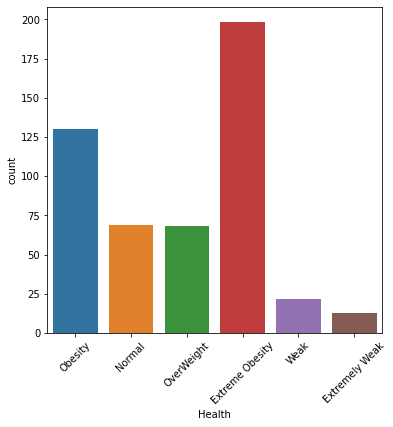

In [18]:
sns.countplot(x="Health",data=df)
plt.xticks(rotation=45)

하지만 이렇게 보는것보다 성별에 따라 나누어서 보는게 좋을 것 같습니다.

극도로 비만엔 여성이 더 많고 정상 체중인 Normal은 남성이 더 많음을 알 수 있습니다.

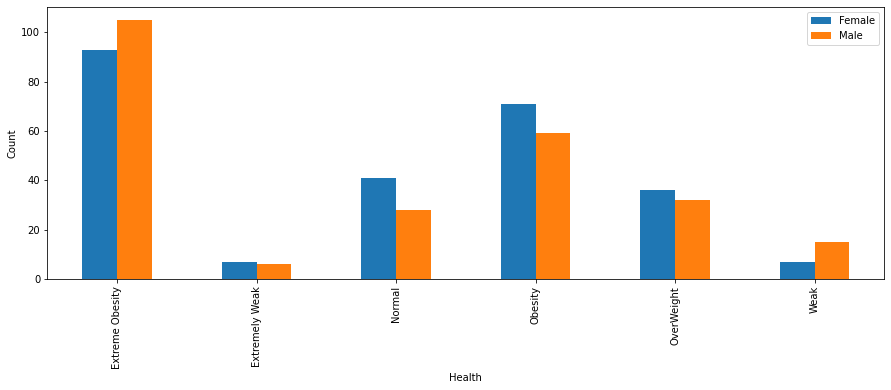

In [19]:
tab = pd.crosstab(index=df['Health'], columns=df['Gender'])
tab.plot(kind="bar", stacked=False, figsize=(15,5))
plt.xlabel('Health')
plt.ylabel('Count')
plt.legend()
plt.show()

어디에 몰려있는지 더 구체적으로 보죠! 초고도비만은 몸무게가 140Kg에 많이 볼려있습니다.키는 어떨까요?

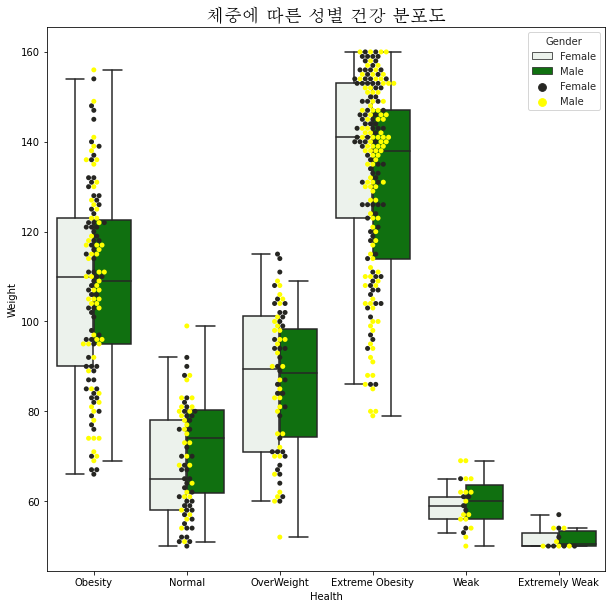

In [20]:
fig,ax = plt.subplots(figsize=(10, 10))
with sns.axes_style("white"):
    sns.boxplot(data=df,x='Health',y='Weight',hue='Gender',color="Green")
    sns.swarmplot(data=df,x='Health',y='Weight',hue='Gender',color="Yellow")
    plt.title("체중에 따른 성별 건강 분포도",fontproperties=fontprop)
    plt.plot()

키의 경우 160cm정도에서 고도비만이 많이 몰려있음을 알 수 있습니다.

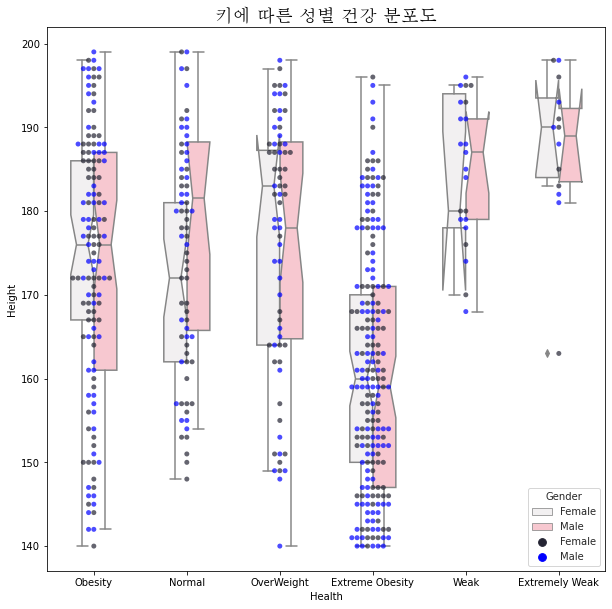

In [21]:
fig,ax = plt.subplots(figsize=(10, 10))
with sns.axes_style("white"):
    sns.boxplot(data=df,x='Health',y='Height',hue='Gender',color="Pink",notch=True,width=.5)
    sns.swarmplot(data=df,x='Health',y='Height',hue='Gender',color="Blue",alpha=.7)
    plt.title("키에 따른 성별 건강 분포도",fontproperties=fontprop)
    plt.plot()

그럼 이제 단순히 키와 몸무게로만 보지말고 BMI로 보겠습니다.  
BMI를 통해서 비만 여부를 가늠할 수 있습니다.

In [22]:
df["BMI"]=df['Weight']/(df['Height']/100)**2

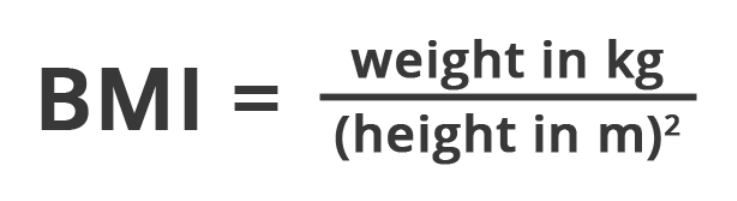

BMI 지수가 높을수록 초고도 비만에 가깝습니다.

In [23]:
df.head()

Gender  Height  Weight      Health        BMI
0    Male     174      96     Obesity  31.708284
1    Male     189      87      Normal  24.355421
2  Female     185     110     Obesity  32.140248
3  Female     195     104  OverWeight  27.350427
4    Male     149      61  OverWeight  27.476240

초고도비만(빨간색)이 정말 많이 분포하는군요

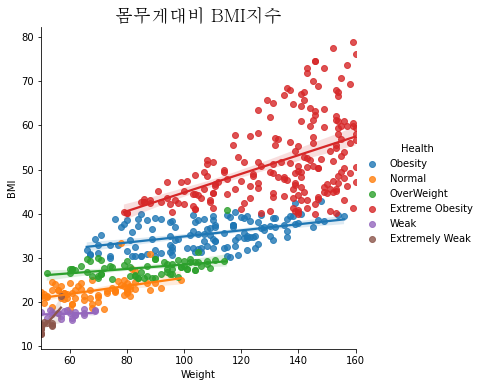

In [24]:
sns.lmplot(data=df,x="Weight",y="BMI",fit_reg=True,hue="Health") 
plt.title("몸무게대비 BMI지수",fontproperties=fontprop)
plt.show()

다시 성별에 따라 나누어 보겠습니다. 흰색이 여성, 빨간색이 남성 입니다.  거의 비슷한거 같기도..하네요.

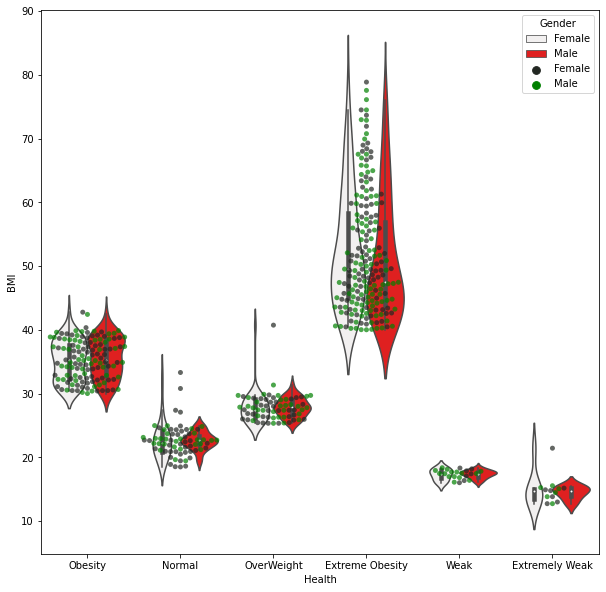

In [25]:
fig=plt.subplots(figsize=(10,10))
sns.violinplot(data=df,y="BMI",x="Health",hue="Gender",color="Red")
sns.swarmplot(data=df,x='Health',y='BMI',hue='Gender',color="Green",alpha=.7) #투명도
plt.show()

아래는키와 몸무무게 상관관계입니다.  

초록색이 여성 보라색이 남성입니다. 대체로 골고루 분포되어 있습니다.
    
따라서 성별이 BMI 값에 큰 영향을 미치지 않는거 같습니다.

Text(0.5, 1.0, '성별에 따른 키,몸무게 분포도')

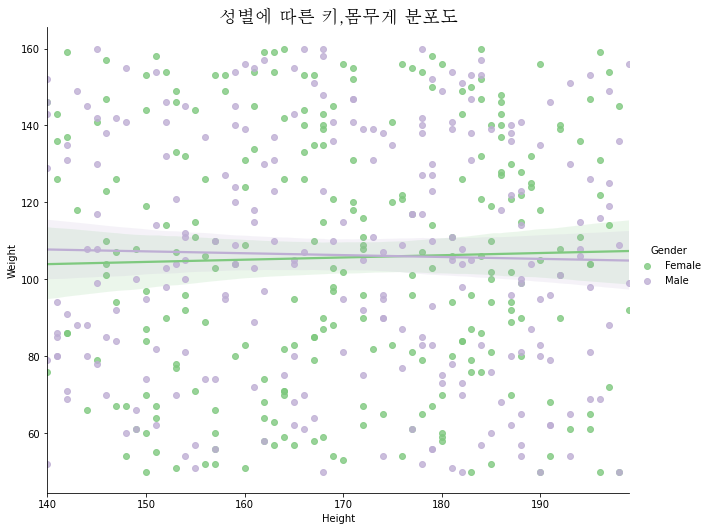

In [26]:
# Trend in Gender based on relationship between Height and Weight
sns.lmplot(x='Height', y='Weight', hue='Gender', data=df,
           fit_reg=True, height=7, aspect=1.25, palette = "Accent")
ax = plt.gca()
ax.set_title("성별에 따른 키,몸무게 분포도",fontproperties=fontprop)

그래도 정확하게 봐야하니 남성과 여성을 나눠서 수치로 확인해 보겠습니다.

In [27]:
male_data = df[df['Gender']=='Male']
female_data = df[df['Gender']=='Female']

<AxesSubplot:>

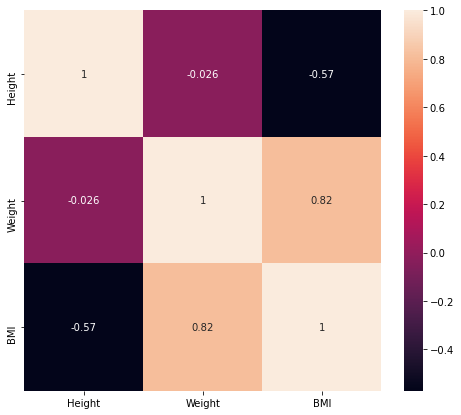

In [28]:
plt.rcParams['figure.figsize'] = (8, 7)
sns.heatmap(male_data.corr(), annot=True)

<AxesSubplot:>

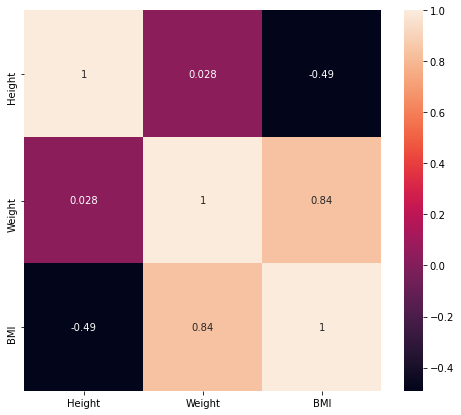

In [29]:
plt.rcParams['figure.figsize'] = (8, 7)
sns.heatmap(female_data.corr(), annot=True)

수치로 봐도 거의 똑같습니다. 제가 내린 결론은 BMI지수와 성별간의 상관관계는 별로 없다.

여기까진 제가 도출한 데이터 분석이죠. 그렇다면 인공지능은 어떻게 생각할까요?

이걸로 딥러닝모델 한번 만들어 보겠습니다. 키 몸무게 건강 등급만을가지고 한번 남성일지 여성일지 맞춰보는 것입니다.

그럴려면 약간의 데이터 가공이 필요한데요 남자는 1, 여자는 0, 그리고 Health는 초기의 0~5로 되돌려 놓겠습니다.

In [30]:
df["Gender"] = df["Gender"].astype('category')
df["Gender"] = df["Gender"].cat.codes
df.head()

Gender  Height  Weight      Health        BMI
0       1     174      96     Obesity  31.708284
1       1     189      87      Normal  24.355421
2       0     185     110     Obesity  32.140248
3       0     195     104  OverWeight  27.350427
4       1     149      61  OverWeight  27.476240

In [31]:
def healthy(x):
    if(x=="Extremely Weak"):
        return 0
    elif(x=="Weak"):
        return 1
    elif(x=="Normal"):
        return 2
    elif(x=="OverWeight"):
        return 3
    elif(x=="Obesity"):
        return 4
    else:
        return 5
    
    
df["Health"]=df['Health'].apply(healthy)

In [32]:
df.head()

Gender  Height  Weight  Health        BMI
0       1     174      96       4  31.708284
1       1     189      87       2  24.355421
2       0     185     110       4  32.140248
3       0     195     104       3  27.350427
4       1     149      61       3  27.476240

다시 BMI는 삭제해줍니다.

In [33]:
df=df.drop(columns='BMI')


In [34]:
df.head()

Gender  Height  Weight  Health
0       1     174      96       4
1       1     189      87       2
2       0     185     110       4
3       0     195     104       3
4       1     149      61       3

In [35]:
import tensorflow as tf

y 데이터에 성별

In [36]:
yData=df['Gender'].values 
print(yData)

[1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0
 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1
 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0
 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0
 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0
 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1
 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1
 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 0 

x 데이터에 키, 몸무게, 건강등급

In [37]:
xData=[]
for i,rows in df.iterrows():
    xData.append([rows['Height'],rows['Weight'],rows['Health']])

여기서 Sequential을 쓰면 신경망 레이어들을 쉽게 만들 수 있죠

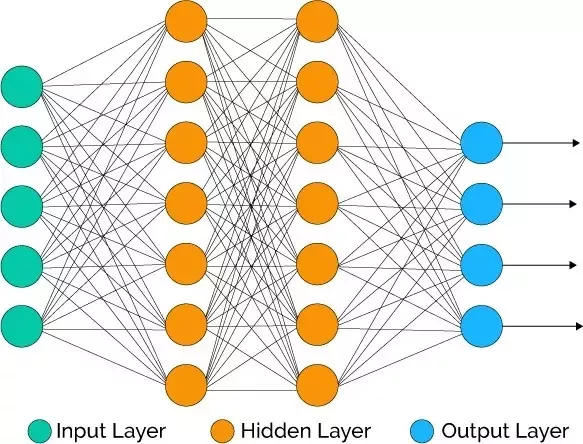

각각의 레이어의 64와 128, 활성함수는 tanh를 넣어주고요 마지막 노드에는 활성함수로 시그모이드를 넣어줍니다.   
컴파일 할땐 옵티마이저에 아담을, 로스에는 바이너리 크로스 앤트로피, 메트릭스에는 어큐리시를 넣어줍니다. 
x엔 학습데이터를 y엔 정답을 넣어주고 에폭은 2000번을 넣어줍니다.

In [38]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(64,activation='tanh'),
    tf.keras.layers.Dense(128,activation='tanh'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(np.array(xData),np.array(yData),epochs=2000)

Epoch 1/2000
16/16 [==============================] - 1s 1ms/step - loss: 0.7231 - accuracy: 0.4957
Epoch 2/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.7057 - accuracy: 0.4899
Epoch 3/2000
16/16 [==============================] - 0s 934us/step - loss: 0.7109 - accuracy: 0.4862
Epoch 4/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.7005 - accuracy: 0.5184
Epoch 5/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.7067 - accuracy: 0.4716
Epoch 6/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.7204 - accuracy: 0.4764
Epoch 7/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5333
Epoch 8/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.5102
Epoch 9/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6959 - accuracy: 0.5107
Epoch 10/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.54

Epoch 82/2000
16/16 [==============================] - 0s 934us/step - loss: 0.6939 - accuracy: 0.5300
Epoch 83/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.5512
Epoch 84/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.5601
Epoch 85/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6892 - accuracy: 0.5183
Epoch 86/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5655
Epoch 87/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5151
Epoch 88/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.5098
Epoch 89/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5098
Epoch 90/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6976 - accuracy: 0.5079
Epoch 91/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6969 - acc

16/16 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.5366
Epoch 162/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6844 - accuracy: 0.5454
Epoch 163/2000
16/16 [==============================] - 0s 934us/step - loss: 0.6904 - accuracy: 0.5201
Epoch 164/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5436
Epoch 165/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6878 - accuracy: 0.5531
Epoch 166/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5085
Epoch 167/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.5618
Epoch 168/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.5281
Epoch 169/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.5521
Epoch 170/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 

16/16 [==============================] - 0s 934us/step - loss: 0.6865 - accuracy: 0.5410
Epoch 242/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.5508
Epoch 243/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6811 - accuracy: 0.5857
Epoch 244/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.5710
Epoch 245/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.5715
Epoch 246/2000
16/16 [==============================] - 0s 934us/step - loss: 0.6831 - accuracy: 0.5698
Epoch 247/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.5516
Epoch 248/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.5654
Epoch 249/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5223
Epoch 250/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy

16/16 [==============================] - 0s 1ms/step - loss: 0.6790 - accuracy: 0.5648
Epoch 321/2000
16/16 [==============================] - 0s 933us/step - loss: 0.6832 - accuracy: 0.5530
Epoch 322/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.5342
Epoch 323/2000
16/16 [==============================] - 0s 933us/step - loss: 0.6871 - accuracy: 0.5266
Epoch 324/2000
16/16 [==============================] - 0s 933us/step - loss: 0.6775 - accuracy: 0.5704
Epoch 325/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.5284
Epoch 326/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.5586
Epoch 327/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6780 - accuracy: 0.5718
Epoch 328/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6984 - accuracy: 0.5188
Epoch 329/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6760 - accura

16/16 [==============================] - 0s 1ms/step - loss: 0.6727 - accuracy: 0.5901
Epoch 401/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6827 - accuracy: 0.5346
Epoch 402/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5883
Epoch 403/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6796 - accuracy: 0.5755
Epoch 404/2000
16/16 [==============================] - 0s 933us/step - loss: 0.6691 - accuracy: 0.5762
Epoch 405/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6741 - accuracy: 0.5816
Epoch 406/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6826 - accuracy: 0.5665
Epoch 407/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6771 - accuracy: 0.5794
Epoch 408/2000
16/16 [==============================] - 0s 933us/step - loss: 0.6907 - accuracy: 0.5505
Epoch 409/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6892 - accu

16/16 [==============================] - 0s 1ms/step - loss: 0.6648 - accuracy: 0.5989
Epoch 480/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6711 - accuracy: 0.6009
Epoch 481/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6709 - accuracy: 0.5551
Epoch 482/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.5590
Epoch 483/2000
16/16 [==============================] - ETA: 0s - loss: 0.6716 - accuracy: 0.53 - 0s 1ms/step - loss: 0.6705 - accuracy: 0.5692
Epoch 484/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6836 - accuracy: 0.5370
Epoch 485/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6726 - accuracy: 0.5981
Epoch 486/2000
16/16 [==============================] - 0s 933us/step - loss: 0.6786 - accuracy: 0.5480
Epoch 487/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6811 - accuracy: 0.5629
Epoch 488/2000
16/16 [=============================

16/16 [==============================] - 0s 1ms/step - loss: 0.6797 - accuracy: 0.5626
Epoch 559/2000
16/16 [==============================] - 0s 934us/step - loss: 0.6802 - accuracy: 0.5784
Epoch 560/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6691 - accuracy: 0.5873
Epoch 561/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6606 - accuracy: 0.6054
Epoch 562/2000
16/16 [==============================] - 0s 733us/step - loss: 0.6734 - accuracy: 0.5764
Epoch 563/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6793 - accuracy: 0.5597
Epoch 564/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.5690
Epoch 565/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6781 - accuracy: 0.5664
Epoch 566/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6705 - accuracy: 0.5418
Epoch 567/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6697 - accura

16/16 [==============================] - 0s 1ms/step - loss: 0.6606 - accuracy: 0.6152
Epoch 639/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6783 - accuracy: 0.5618
Epoch 640/2000
16/16 [==============================] - 0s 934us/step - loss: 0.6567 - accuracy: 0.6458
Epoch 641/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6664 - accuracy: 0.5904
Epoch 642/2000
16/16 [==============================] - 0s 800us/step - loss: 0.6816 - accuracy: 0.6012
Epoch 643/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6649 - accuracy: 0.6263
Epoch 644/2000
16/16 [==============================] - 0s 933us/step - loss: 0.6929 - accuracy: 0.5135
Epoch 645/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.5585
Epoch 646/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5797
Epoch 647/2000
16/16 [==============================] - 0s 934us/step - loss: 0.6769 - accu

16/16 [==============================] - 0s 1ms/step - loss: 0.6687 - accuracy: 0.5735
Epoch 719/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6690 - accuracy: 0.6078
Epoch 720/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.5689
Epoch 721/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6737 - accuracy: 0.5888
Epoch 722/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6724 - accuracy: 0.5609
Epoch 723/2000
16/16 [==============================] - 0s 933us/step - loss: 0.6783 - accuracy: 0.5720
Epoch 724/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6858 - accuracy: 0.5549
Epoch 725/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 0.5796
Epoch 726/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6616 - accuracy: 0.5747
Epoch 727/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6706 - accuracy: 

16/16 [==============================] - 0s 933us/step - loss: 0.6675 - accuracy: 0.5664
Epoch 799/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6757 - accuracy: 0.5549
Epoch 800/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6781 - accuracy: 0.5861
Epoch 801/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6811 - accuracy: 0.5920
Epoch 802/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6770 - accuracy: 0.5706
Epoch 803/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6602 - accuracy: 0.5926
Epoch 804/2000
16/16 [==============================] - 0s 933us/step - loss: 0.6717 - accuracy: 0.5896
Epoch 805/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6687 - accuracy: 0.5677
Epoch 806/2000
16/16 [==============================] - 0s 934us/step - loss: 0.6735 - accuracy: 0.5737
Epoch 807/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6752 - accu

16/16 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5766
Epoch 879/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.5489
Epoch 880/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.5755
Epoch 881/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6667 - accuracy: 0.6073
Epoch 882/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.5828
Epoch 883/2000
16/16 [==============================] - 0s 933us/step - loss: 0.6815 - accuracy: 0.5614
Epoch 884/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.5762
Epoch 885/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.5941
Epoch 886/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6774 - accuracy: 0.5684
Epoch 887/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6759 - accuracy: 

16/16 [==============================] - 0s 1ms/step - loss: 0.6663 - accuracy: 0.5642
Epoch 959/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6760 - accuracy: 0.5593
Epoch 960/2000
16/16 [==============================] - 0s 934us/step - loss: 0.6848 - accuracy: 0.5439
Epoch 961/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6747 - accuracy: 0.5882
Epoch 962/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6760 - accuracy: 0.5621
Epoch 963/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6693 - accuracy: 0.5624
Epoch 964/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6709 - accuracy: 0.5690
Epoch 965/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.6028
Epoch 966/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6713 - accuracy: 0.5766
Epoch 967/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy

16/16 [==============================] - 0s 1ms/step - loss: 0.6689 - accuracy: 0.5827
Epoch 1039/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6761 - accuracy: 0.5582
Epoch 1040/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6756 - accuracy: 0.5656
Epoch 1041/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.5743
Epoch 1042/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.5831
Epoch 1043/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.5946
Epoch 1044/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.5841
Epoch 1045/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6598 - accuracy: 0.6115
Epoch 1046/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6716 - accuracy: 0.5978
Epoch 1047/2000
16/16 [==============================] - 0s 800us/step - loss: 0.6765 - a

16/16 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.5812
Epoch 1118/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6757 - accuracy: 0.5990
Epoch 1119/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 0.5843
Epoch 1120/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6811 - accuracy: 0.5489
Epoch 1121/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5708
Epoch 1122/2000
16/16 [==============================] - 0s 934us/step - loss: 0.6729 - accuracy: 0.5779
Epoch 1123/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5594
Epoch 1124/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6634 - accuracy: 0.6025
Epoch 1125/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6643 - accuracy: 0.5943
Epoch 1126/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6667 - a

16/16 [==============================] - 0s 934us/step - loss: 0.6620 - accuracy: 0.5932
Epoch 1197/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6797 - accuracy: 0.5420
Epoch 1198/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.5419
Epoch 1199/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6684 - accuracy: 0.5964
Epoch 1200/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6750 - accuracy: 0.6099
Epoch 1201/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6757 - accuracy: 0.5888
Epoch 1202/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5598
Epoch 1203/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.5551
Epoch 1204/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5694
Epoch 1205/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6557 - a

16/16 [==============================] - 0s 1ms/step - loss: 0.6684 - accuracy: 0.5433
Epoch 1275/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6662 - accuracy: 0.6033
Epoch 1276/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6692 - accuracy: 0.5738
Epoch 1277/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6727 - accuracy: 0.5615
Epoch 1278/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6614 - accuracy: 0.5917
Epoch 1279/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6701 - accuracy: 0.5728
Epoch 1280/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6760 - accuracy: 0.5658
Epoch 1281/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6720 - accuracy: 0.5777
Epoch 1282/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.5621
Epoch 1283/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6730 - a

16/16 [==============================] - 0s 933us/step - loss: 0.6629 - accuracy: 0.5785
Epoch 1354/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6644 - accuracy: 0.5831
Epoch 1355/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6648 - accuracy: 0.5847
Epoch 1356/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6553 - accuracy: 0.5955
Epoch 1357/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6671 - accuracy: 0.6023
Epoch 1358/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6707 - accuracy: 0.5847
Epoch 1359/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6767 - accuracy: 0.5893
Epoch 1360/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6747 - accuracy: 0.5773
Epoch 1361/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6654 - accuracy: 0.6010
Epoch 1362/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6710 - a

16/16 [==============================] - 0s 1ms/step - loss: 0.6689 - accuracy: 0.5687
Epoch 1433/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.5746
Epoch 1434/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6752 - accuracy: 0.5524
Epoch 1435/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6672 - accuracy: 0.5786
Epoch 1436/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.5330
Epoch 1437/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6762 - accuracy: 0.5653
Epoch 1438/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6739 - accuracy: 0.5926
Epoch 1439/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6597 - accuracy: 0.5976
Epoch 1440/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6608 - accuracy: 0.5889
Epoch 1441/2000
16/16 [==============================] - 0s 933us/step - loss: 0.6630 - a

16/16 [==============================] - 0s 1ms/step - loss: 0.6639 - accuracy: 0.5890
Epoch 1512/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6690 - accuracy: 0.5868
Epoch 1513/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6675 - accuracy: 0.5911
Epoch 1514/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6715 - accuracy: 0.5644
Epoch 1515/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6622 - accuracy: 0.5835
Epoch 1516/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.5697
Epoch 1517/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6728 - accuracy: 0.5858
Epoch 1518/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.5393
Epoch 1519/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6659 - accuracy: 0.5809
Epoch 1520/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6747 - acc

16/16 [==============================] - 0s 933us/step - loss: 0.6626 - accuracy: 0.5725
Epoch 1591/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6748 - accuracy: 0.5786
Epoch 1592/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6584 - accuracy: 0.6135
Epoch 1593/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6728 - accuracy: 0.5765
Epoch 1594/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6572 - accuracy: 0.6254
Epoch 1595/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6721 - accuracy: 0.5872
Epoch 1596/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6797 - accuracy: 0.5573
Epoch 1597/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.5777
Epoch 1598/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6507 - accuracy: 0.6287
Epoch 1599/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6686 - a

16/16 [==============================] - 0s 1ms/step - loss: 0.6563 - accuracy: 0.5904
Epoch 1670/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6612 - accuracy: 0.6118
Epoch 1671/2000
16/16 [==============================] - 0s 933us/step - loss: 0.6716 - accuracy: 0.5551
Epoch 1672/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.6299
Epoch 1673/2000
16/16 [==============================] - 0s 934us/step - loss: 0.6646 - accuracy: 0.5702
Epoch 1674/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.5843
Epoch 1675/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6660 - accuracy: 0.5860
Epoch 1676/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6724 - accuracy: 0.5893
Epoch 1677/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6657 - accuracy: 0.5868
Epoch 1678/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6679 -

16/16 [==============================] - 0s 1ms/step - loss: 0.6676 - accuracy: 0.6127
Epoch 1749/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6501 - accuracy: 0.6225
Epoch 1750/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.6148
Epoch 1751/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.5708
Epoch 1752/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.5863
Epoch 1753/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6639 - accuracy: 0.5951
Epoch 1754/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6709 - accuracy: 0.5925
Epoch 1755/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6636 - accuracy: 0.5778
Epoch 1756/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.5483
Epoch 1757/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6679 - acc

16/16 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.5677
Epoch 1828/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.5971
Epoch 1829/2000
16/16 [==============================] - 0s 933us/step - loss: 0.6777 - accuracy: 0.5536
Epoch 1830/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6641 - accuracy: 0.5815
Epoch 1831/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6558 - accuracy: 0.5924
Epoch 1832/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6509 - accuracy: 0.6097
Epoch 1833/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6696 - accuracy: 0.5751
Epoch 1834/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6692 - accuracy: 0.5539
Epoch 1835/2000
16/16 [==============================] - 0s 933us/step - loss: 0.6698 - accuracy: 0.5895
Epoch 1836/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6561

16/16 [==============================] - 0s 933us/step - loss: 0.6636 - accuracy: 0.5892
Epoch 1907/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6575 - accuracy: 0.5812
Epoch 1908/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5384
Epoch 1909/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6493 - accuracy: 0.6043
Epoch 1910/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6656 - accuracy: 0.6003
Epoch 1911/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6703 - accuracy: 0.5487
Epoch 1912/2000
16/16 [==============================] - 0s 934us/step - loss: 0.6748 - accuracy: 0.5431
Epoch 1913/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6622 - accuracy: 0.5858
Epoch 1914/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6762 - accuracy: 0.5802
Epoch 1915/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6682 -

16/16 [==============================] - 0s 1ms/step - loss: 0.6606 - accuracy: 0.5824
Epoch 1986/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6623 - accuracy: 0.5996
Epoch 1987/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6598 - accuracy: 0.6084
Epoch 1988/2000
16/16 [==============================] - 0s 934us/step - loss: 0.6685 - accuracy: 0.5676
Epoch 1989/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6622 - accuracy: 0.5818
Epoch 1990/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.5634
Epoch 1991/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6720 - accuracy: 0.5922
Epoch 1992/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.5948
Epoch 1993/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.5567
Epoch 1994/2000
16/16 [==============================] - 0s 933us/step - loss: 0.6628

In [39]:
predict =model.predict([[175,70,2]])
print(predict)

[[0.61193776]]
